In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/Users/ridhipurohit/Documents/GitHub/energy_project_CSEP/energy_modeling/utils/combined_data_2013_20.csv')

In [6]:
df.head()

,date,NR_peak_demand,WR_peak_demand,SR_peak_demand,ER_peak_demand,NER_peak_demand,Total_peak_demand,NR_peak_shortage,WR_peak_shortage,SR_peak_shortage,ER_peak_shortage,NER_peak_shortage,Total_peak_shortage
0,2013-03-31,27482,34592,28778,14256.0,1557,106665.0,1500,889,5156,416,355,8316
1,2013-04-01,28291,36791,30828,14308.0,1659,111877.0,1694,1073,5663,857,249,9536
2,2013-04-02,29845,36496,30407,14061.0,1594,112403.0,2010,969,5792,601,331,9703
3,2013-04-03,31321,37155,28887,13563.0,1660,112586.0,2108,793,6514,1142,307,10864
4,2013-04-04,32182,37303,30916,14520.0,1537,116458.0,2036,1167,5409,1013,383,10008


In [105]:
df['date']= pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = pd.to_datetime(df['date']).dt.strftime('%B')
df.head(1)

,date,NR_peak_demand,WR_peak_demand,SR_peak_demand,ER_peak_demand,NER_peak_demand,Total_peak_demand,NR_peak_shortage,WR_peak_shortage,SR_peak_shortage,ER_peak_shortage,NER_peak_shortage,Total_peak_shortage,year,month
0,2013-03-31,27482,34592,28778,14256.0,1557,106665.0,1500,889,5156,416,355,8316,2013,March


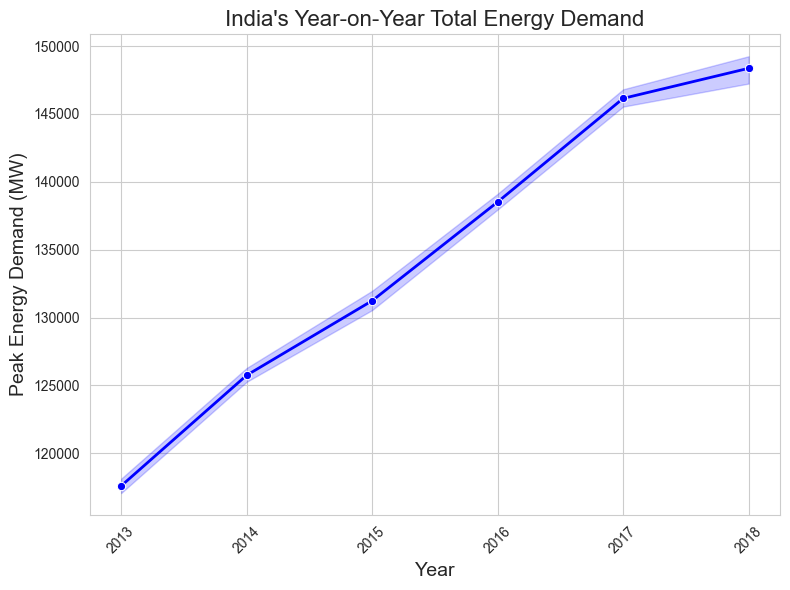

In [106]:
# year-on-year demand

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))  
sns.lineplot(data=df, x='year', y='Total_peak_demand', marker='o', color='b', linewidth=2)

plt.title('India\'s Year-on-Year Total Energy Demand', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Peak Energy Demand (MW)', fontsize=14)
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

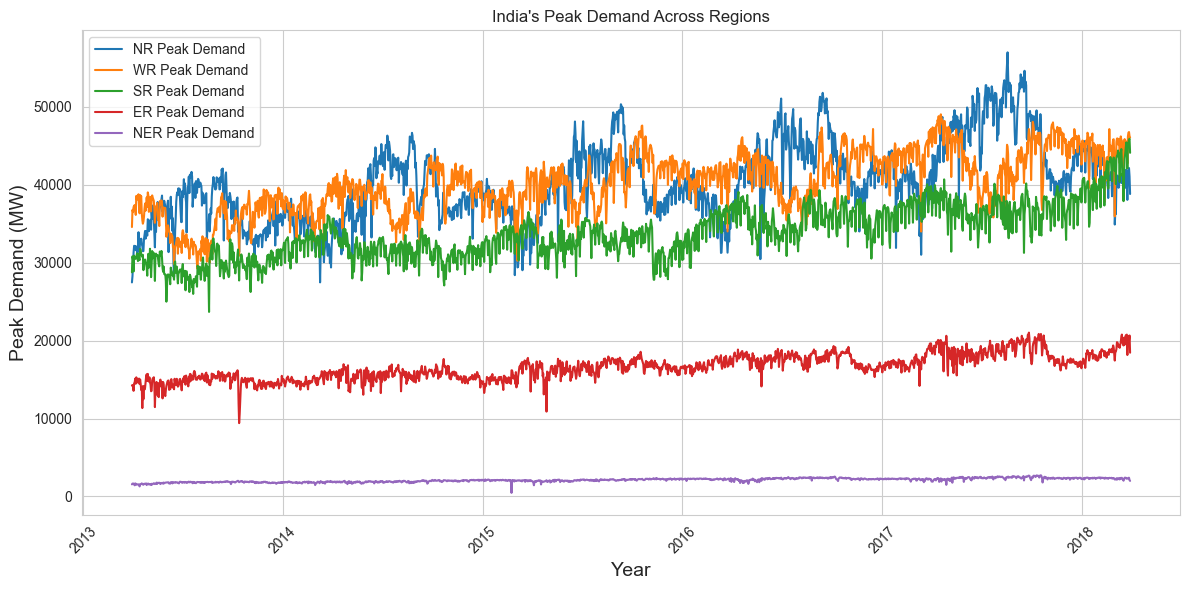

In [107]:
# peak demand across five regions

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df['date'], df['NR_peak_demand'], label='NR Peak Demand')

ax.plot(df['date'], df['WR_peak_demand'], label='WR Peak Demand')

ax.plot(df['date'], df['SR_peak_demand'], label='SR Peak Demand')

ax.plot(df['date'], df['ER_peak_demand'], label='ER Peak Demand')

ax.plot(df['date'], df['NER_peak_demand'], label='NER Peak Demand')

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Peak Demand (MW)', fontsize=14)
ax.set_title('India\'s Peak Demand Across Regions')

plt.xticks(rotation=45)

ax.legend()

plt.tight_layout()
plt.show()

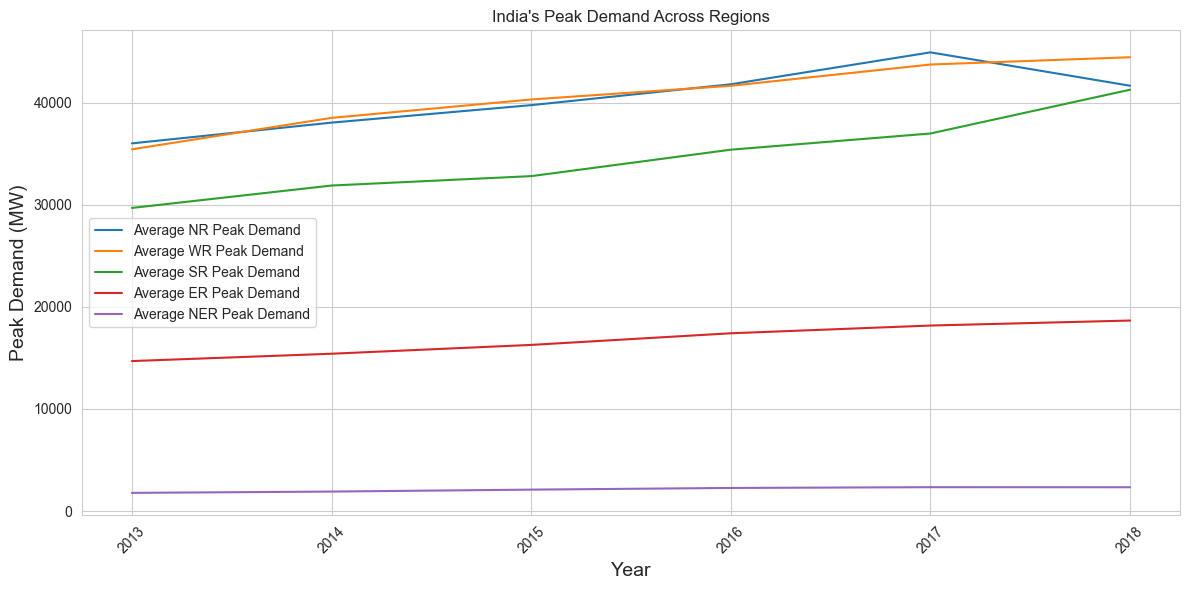

In [108]:
# average peak demand across regions
avg_demand = df.groupby('year').agg({
    'NR_peak_demand': 'mean',
    'WR_peak_demand': 'mean',
    'SR_peak_demand': 'mean',
    'ER_peak_demand': 'mean',
    'NER_peak_demand': 'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(avg_demand['year'], avg_demand['NR_peak_demand'], label='Average NR Peak Demand')
ax.plot(avg_demand['year'], avg_demand['WR_peak_demand'], label='Average WR Peak Demand')
ax.plot(avg_demand['year'], avg_demand['SR_peak_demand'], label='Average SR Peak Demand')
ax.plot(avg_demand['year'], avg_demand['ER_peak_demand'], label='Average ER Peak Demand')
ax.plot(avg_demand['year'], avg_demand['NER_peak_demand'], label='Average NER Peak Demand')

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Peak Demand (MW)', fontsize=14)
ax.set_title('India\'s Peak Demand Across Regions')

plt.xticks(rotation=45)

ax.legend()

plt.tight_layout()
plt.show()

In [109]:
avg_monthly_demand = df.groupby(['month', 'year']).agg({
    'Total_peak_demand': 'mean'
}).reset_index()

avg_monthly_demand = avg_monthly_demand[avg_monthly_demand['year'] != 2013]
avg_monthly_demand = avg_monthly_demand[avg_monthly_demand['year'] != 2018]

yearly_avg_monthly_demand = avg_monthly_demand.groupby(['month']).agg({
    'Total_peak_demand': 'mean'
}).reset_index()


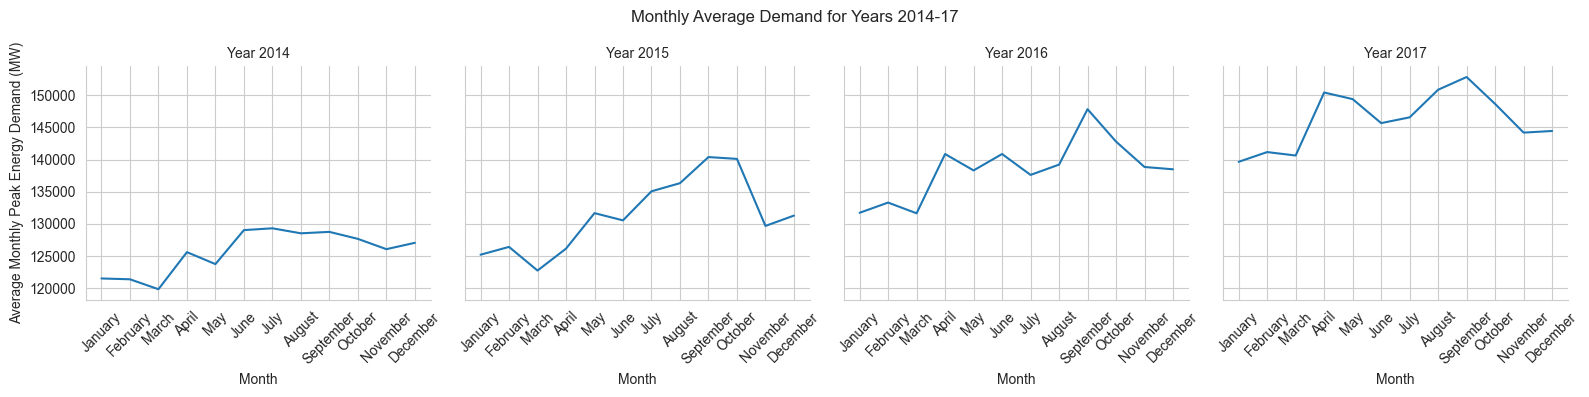

In [110]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

avg_monthly_demand['month'] = pd.Categorical(avg_monthly_demand['month'], categories=month_order, ordered=True)

sns.set_style("whitegrid")

g = sns.FacetGrid(avg_monthly_demand, col="year", col_wrap=4, palette="Blues_d",  height=4)  

g.map(sns.lineplot, "month", "Total_peak_demand")

g.set_xticklabels(rotation=45)

g.set_titles("Year {col_name}")

g.fig.subplots_adjust(top=0.85)

g.fig.suptitle("Monthly Average Demand for Years 2014-17")
g.set_axis_labels("Month", "Average Monthly Peak Energy Demand (MW)")

plt.subplots_adjust(top=0.9)
plt.tight_layout()


plt.show()

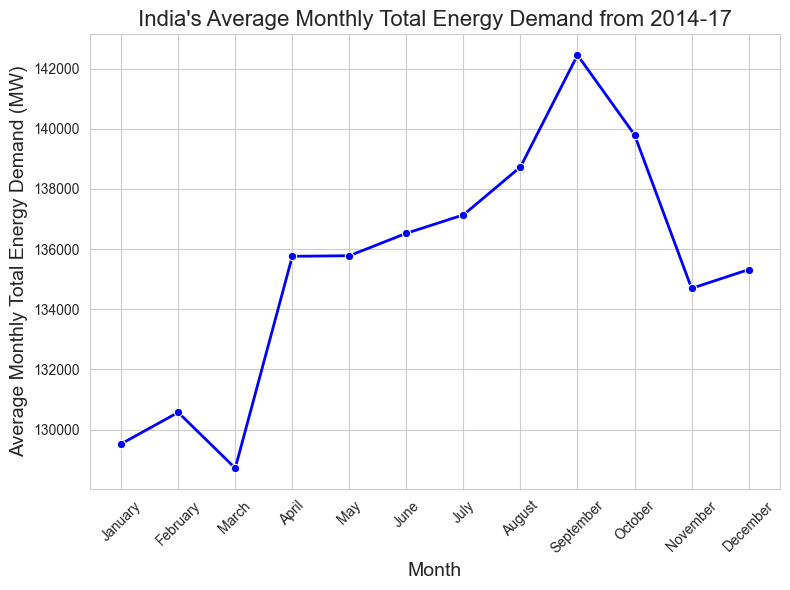

In [111]:
# Average monthly demand across the years

yearly_avg_monthly_demand['month'] = pd.Categorical(yearly_avg_monthly_demand['month'], categories=month_order, ordered=True)

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))  
sns.lineplot(data=yearly_avg_monthly_demand, x='month', y='Total_peak_demand', marker='o', color='b', linewidth=2)

plt.title('India\'s Average Monthly Total Energy Demand from 2014-17', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Monthly Total Energy Demand (MW)', fontsize=14)
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()